In [1]:
import sqlite3
import pandas as pd


def get_definition(connection):
    cursor = connection.cursor()
    get_query = """
    SELECT model_name, sum_distance
    FROM definitions, terms
    WHERE definitions.term_id = terms.id AND model_id IN (1, 2, 3, 7, 8) AND counter = 1 AND terms.is_term = 'False'
"""
    cursor.execute(get_query)
    definitions = cursor.fetchall()

    return definitions

In [11]:

db_path = '../database/drone_definitions.db'
connection = sqlite3.connect(db_path)
definition = get_definition(connection)
definition_df = pd.DataFrame(definition, columns=['model_name', 'sum_distance'])
connection.close()

In [12]:
definition_df['model_name'] = definition_df['model_name'].replace({'chatgpt': 'Davinci-002', 'gptturbo': 'GPT3.5', 'chatsonic': 'ChatSonic', 'claude': 'Claude', 'gpt4': 'GPT4'})
definition_df

,model_name,sum_distance
0,Davinci-002,6.832258
1,Davinci-002,7.022258
2,Davinci-002,7.334737
3,Davinci-002,7.040604
4,Davinci-002,6.497194
...,...,...
140,GPT4,7.520232
141,GPT4,7.100780
142,ChatSonic,7.558001
143,ChatSonic,7.902263


In [26]:
import matplotlib.pyplot as plt
import matplotlib
# Group by 'model_id' and calculate the desired summary statistics
# summary_stats = definition_df.groupby('model_name')['sum_distance'].agg(['max', 'mean', 'min', 'std'])

# Grouped statistics
grouped_stats = definition_df.groupby('model_name')['sum_distance'].agg(['max', 'mean', 'min', 'std'])
# print("grouped_stats: ", grouped_stats.head(3))
# Overall statistics
overall_stats = definition_df['sum_distance'].agg(['max', 'mean', 'min', 'std']).rename(index='Overall')
# print("overall_stats: ", overall_stats.head(3))
# Transpose the overall_stats DataFrame
overall_stats = overall_stats.to_frame().T

# Concatenate grouped and overall statistics
summary_stats = pd.concat([grouped_stats, overall_stats])
# Rename the 'index' column to 'model_name'
# summary_stats = summary_stats.rename_axis('model_name', axis='columns')
summary_stats.reset_index(inplace=True)
summary_stats

,index,max,mean,min,std
0,ChatSonic,9.093314,7.497467,6.599724,0.639681
1,Claude,10.927102,8.176708,6.794334,0.902108
2,Davinci-002,9.398949,7.455192,6.371171,0.740423
3,GPT3.5,8.384224,7.219940,5.921727,0.564780
4,GPT4,8.706802,7.303784,6.218606,0.474616
5,Overall,10.927102,7.530618,5.921727,0.751971


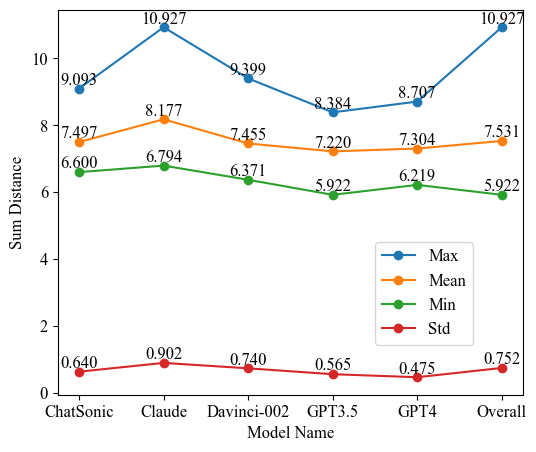

In [27]:

summary_stats = summary_stats.rename(columns={'max': 'Max', 'mean': 'Mean', 'min': 'Min', 'std': 'Std', 'index': 'model_name'})

# Reset the index to make 'model_id' a regular column
summary_stats = summary_stats.reset_index()
matplotlib.rcParams['font.family'] = 'Times New Roman'
matplotlib.rcParams['font.size'] = 12
# Set the figure size
plt.figure(figsize=(6, 5))

# Plot the line graph
x = summary_stats['model_name']
columns = ['Max', 'Mean', 'Min', 'Std']
for col in columns:
    plt.plot(x, summary_stats[col], marker='o', label=col)
    for i, j in zip(x, summary_stats[col]):
        plt.text(i, j, f'{j:.3f}', ha='center', va='bottom')

# Set the x-axis label, y-axis label, and title
plt.xlabel('Model Name')
plt.ylabel('Sum Distance')
# plt.title('Summary Statistics of Sum Distance')

# Show the legend
plt.legend(loc='lower right', borderaxespad=3)
plt.savefig('visualization/sum_distance_statistics_invalid.pdf')
# Show the plot
plt.show()